In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from mopet import mopet

from synchronization import plots
from synchronization import runner
from synchronization import constants

# Test Field 

Goal is to modify coupling strengths so that bursting in E and I population vanishes.

* Bursting of Exc pop is reduced if J_itoe is increased
* Bursting of Inh pop is reduced if J_itoi is increased


**Challenge:**

* Increased noise strengths must still lead to synchronization!


## Default Parameters

* Drive from E -> I needs to stay so low that I neurons do not burst!


In [99]:
params = {
  "runtime": 500.0,

  "J_itoi": 6.0,
  "J_etoe": 0.1,
  "J_etoi": 0.3,
  "J_itoe": 6.0,
    
  "J_ppee": 0.6,
  "J_ppei": 0.6,

  "ou_enabled": [False, False],

  "poisson_enabled": [True, True],
  "poisson_variance": 2.0,
  "poisson_p": 0.7,
  "poisson_size": 800,
  "poisson_mean_input": 250,

  "N_pop": 2
}

## The ideal model

In [100]:
params_mid = dict(params)

params_mid.update({
  "J_ppee": 1.3,
  "J_ppei": 1.3,    
})

low_strength = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 31250.0 - single neuron 39.0625
Poisson strength: 0.008
Net 2 - rate for single neuron 27.34375
Initialization time: 0.48924708366394043s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 4s
==== Network Run Finished ====
runtime: 7.4


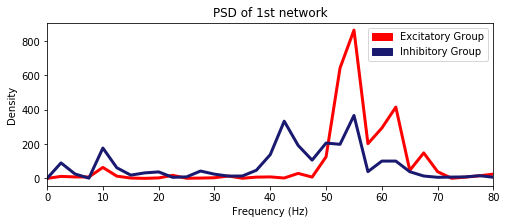

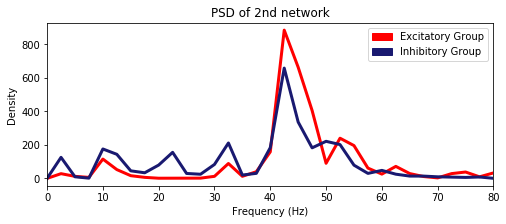

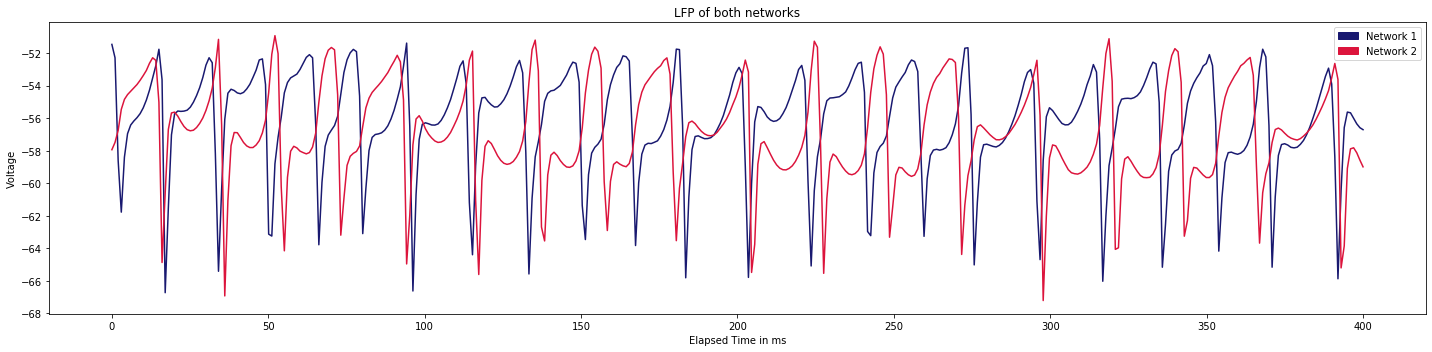

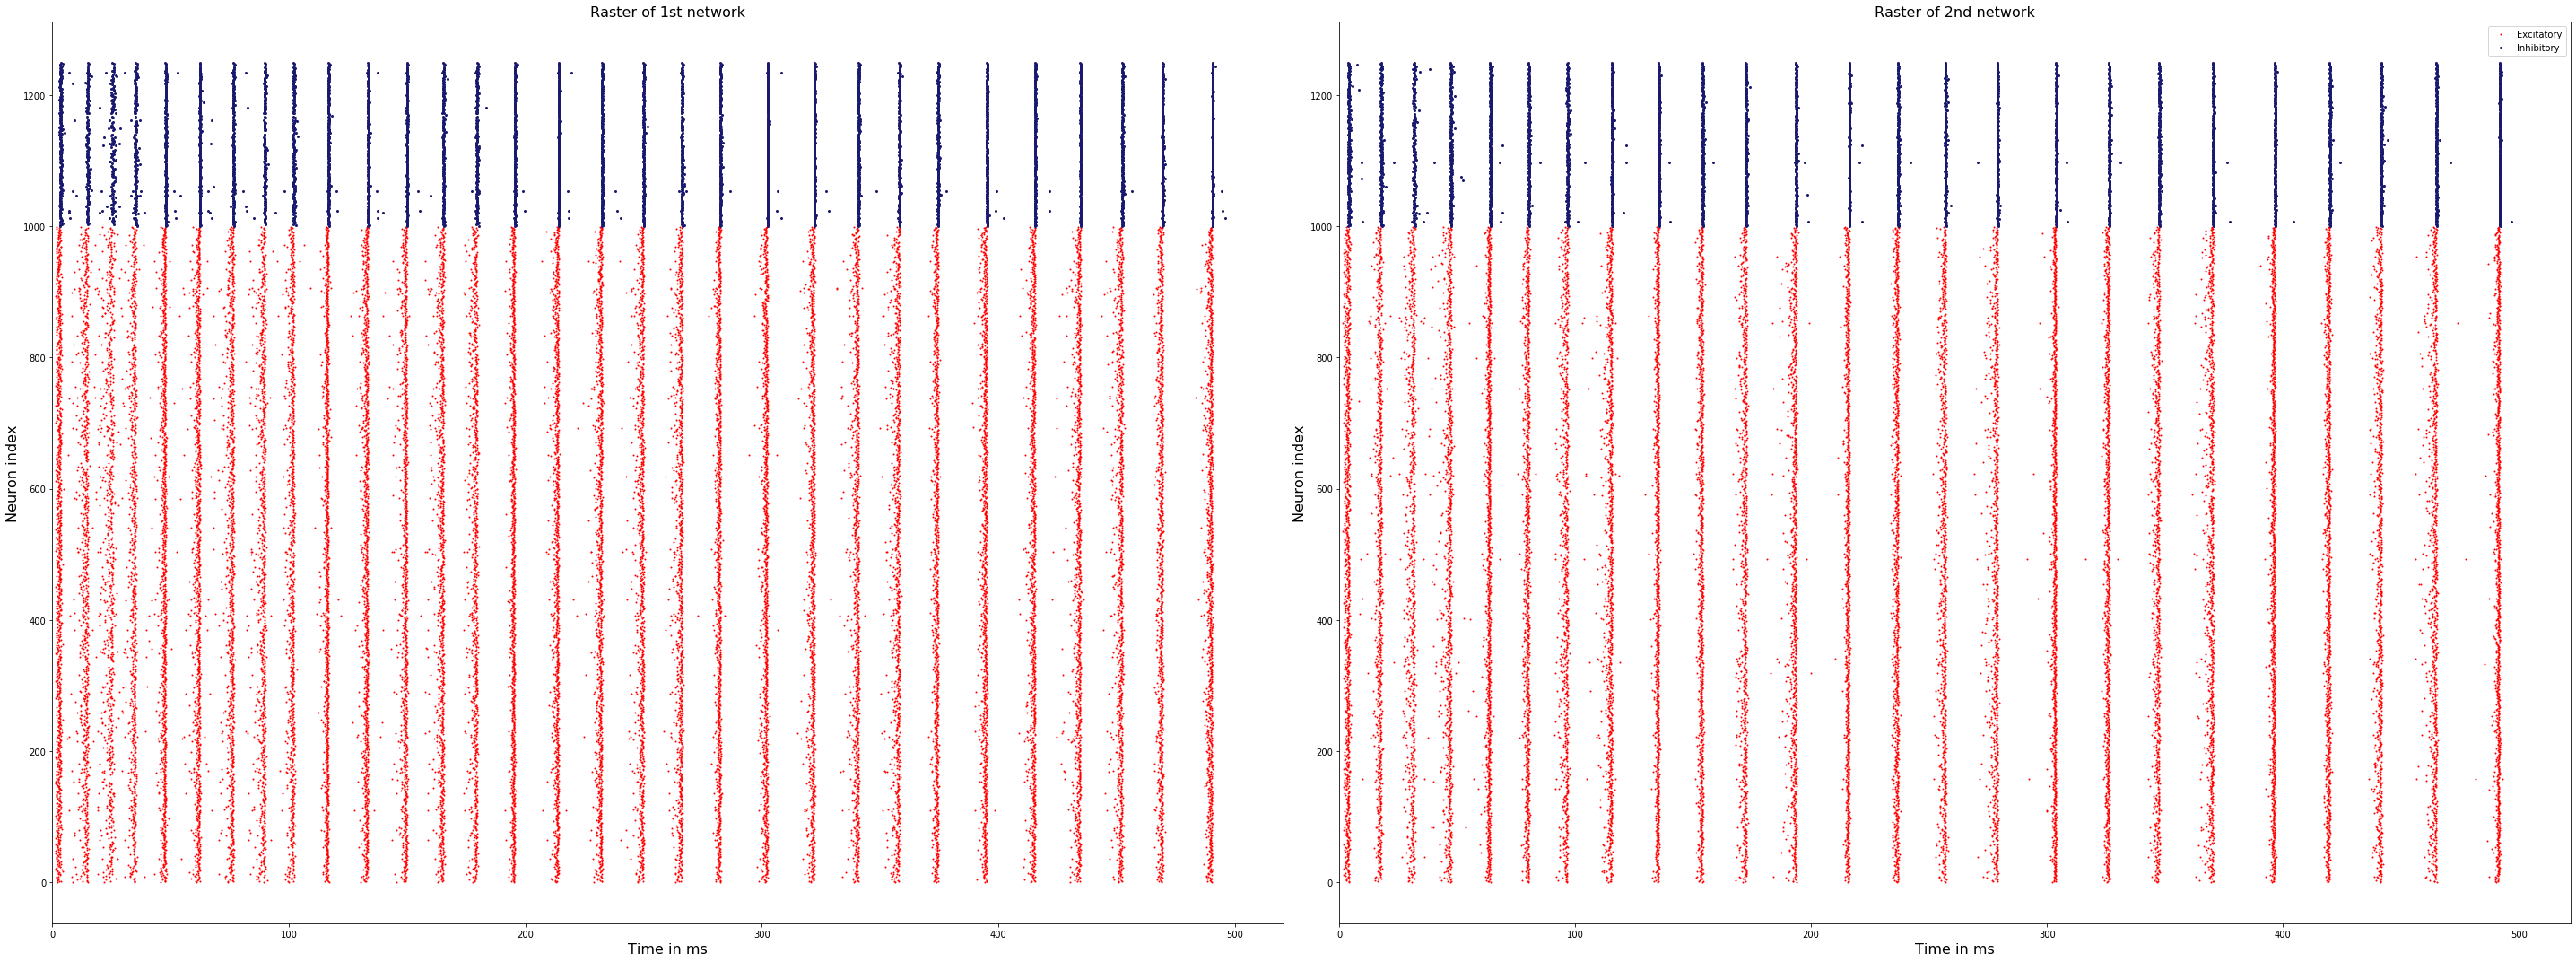

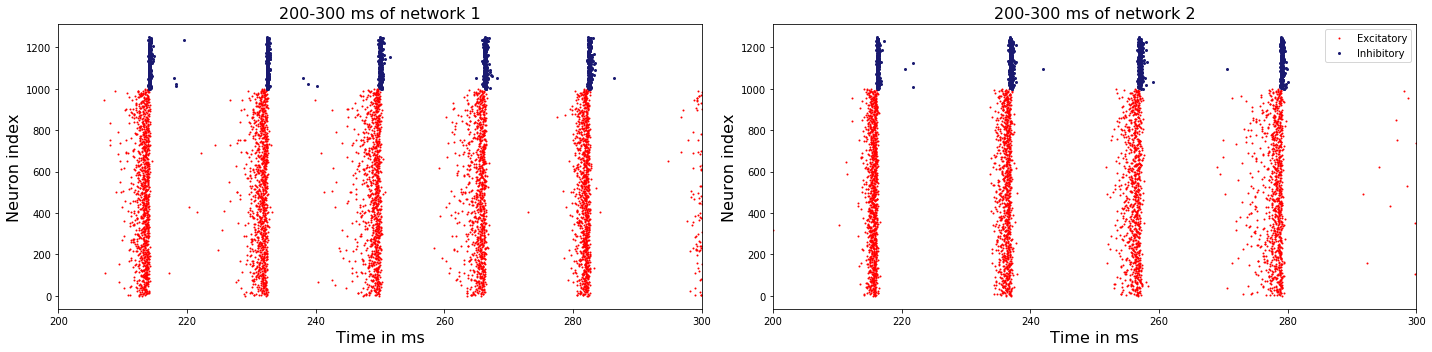

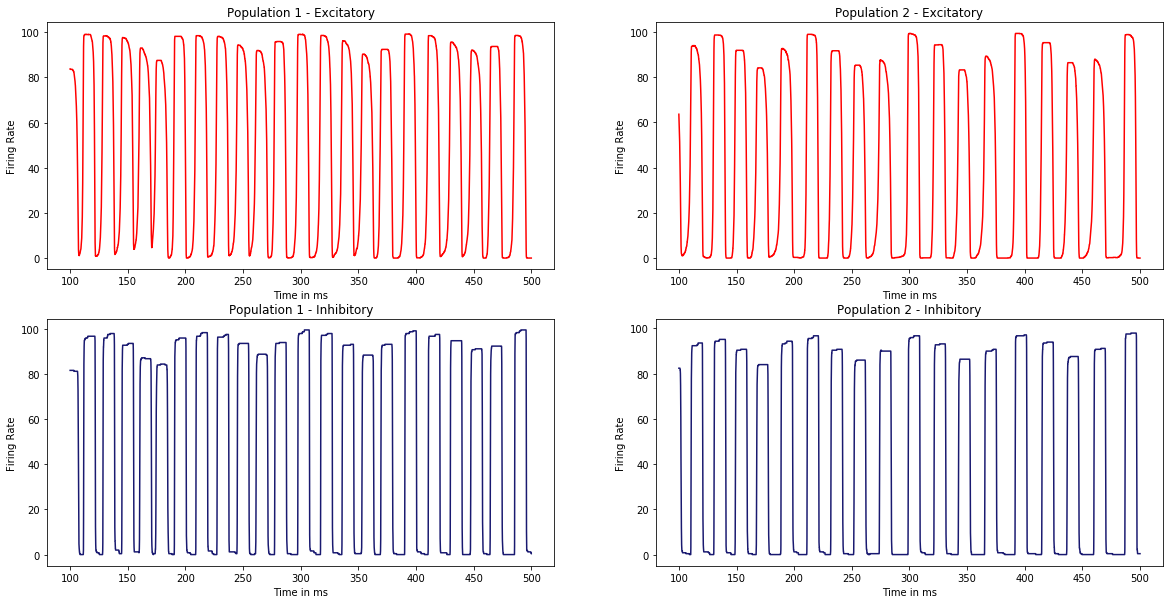

In [101]:
plots.plot_results(low_strength, pop_rates=True, xlim_psd=80, full_raster=True)

## Second variation 

In [5]:
params_mid = dict(params)
params_mid["poisson_variance"] = 4.0

low_strength = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 15625.0 - single neuron 19.53125
Poisson strength: 0.016
Net 2 - rate for single neuron 16.40625
Initialization time: 0.6617109775543213s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 0.6 s
0.6 s (100%) simulated in 5s
==== Network Run Finished ====
runtime: 9.5


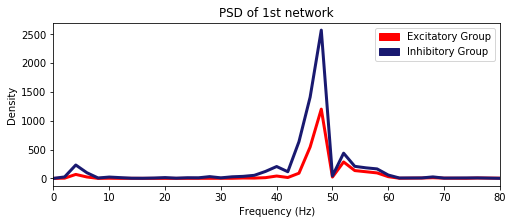

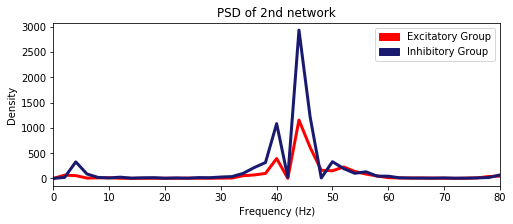

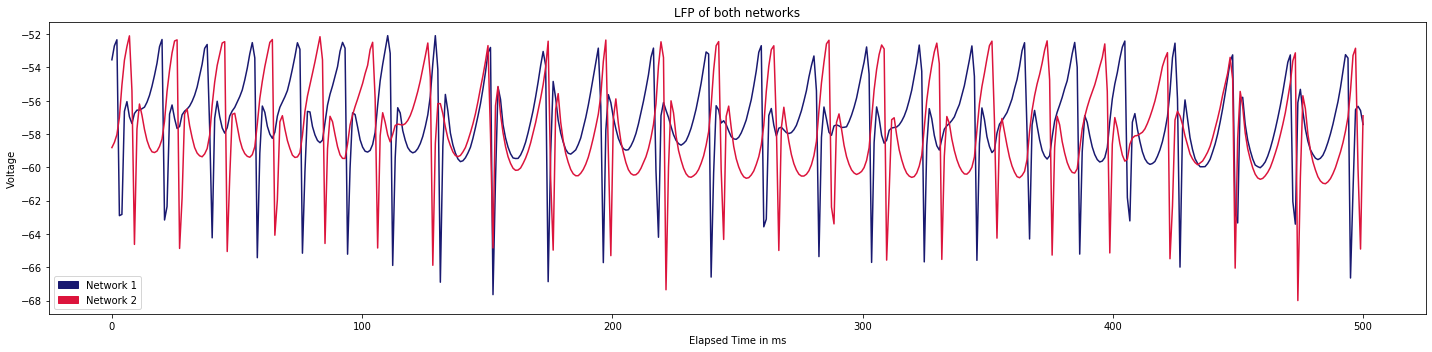

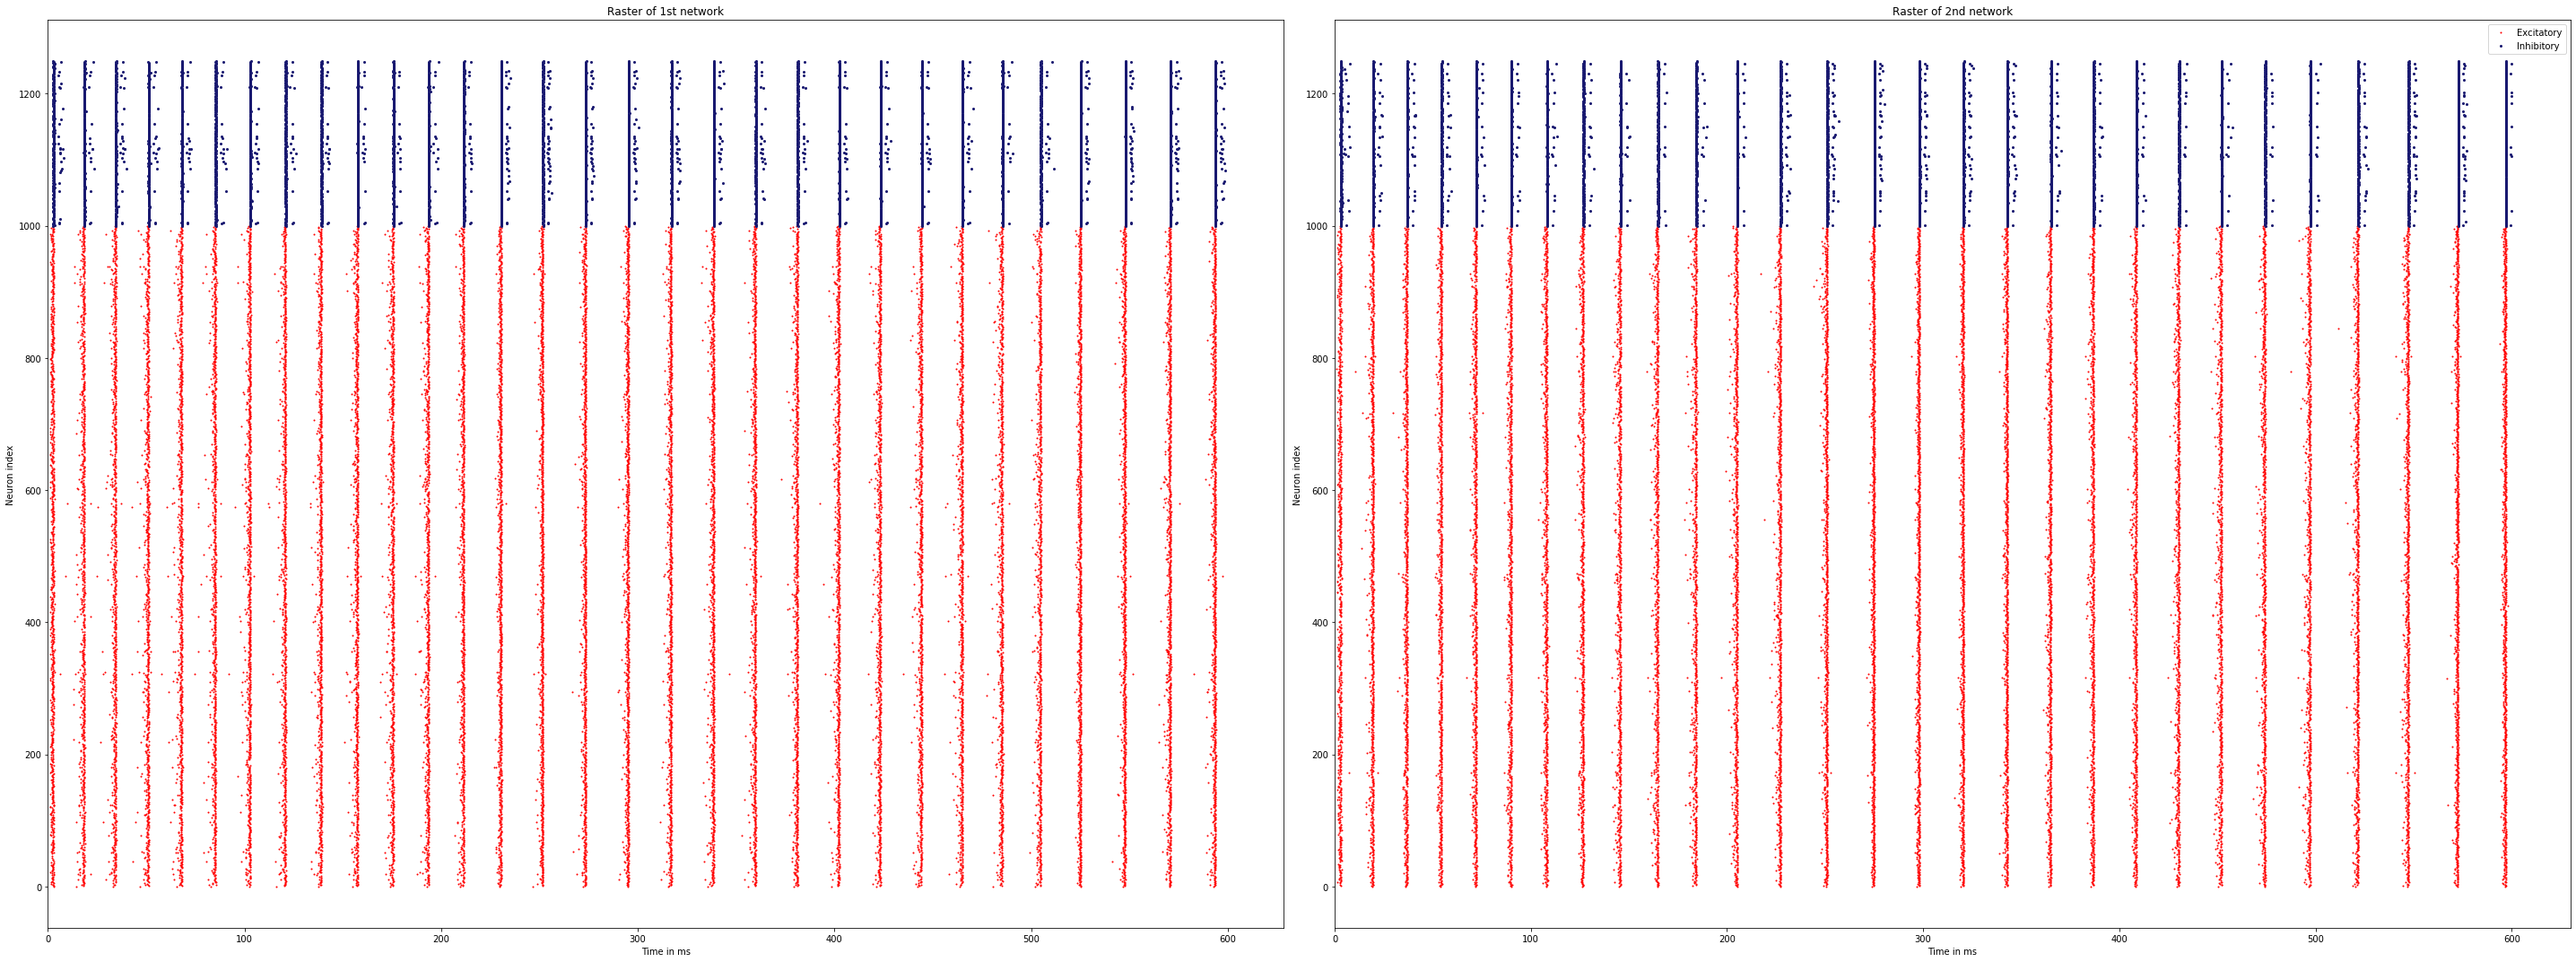

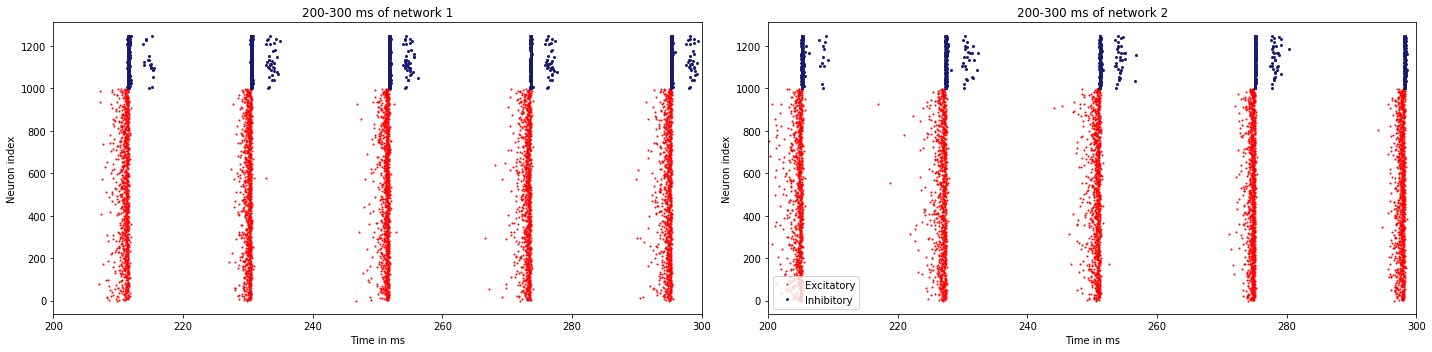

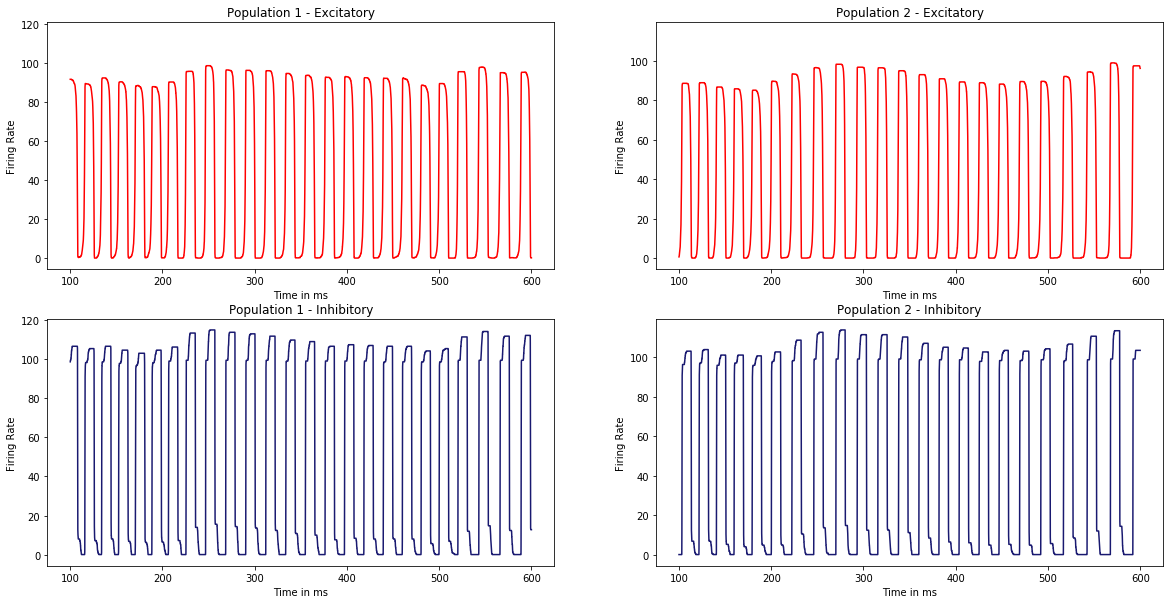

In [6]:
plots.plot_results(low_strength, pop_rates=True, xlim_psd=80, full_raster=True)

# Explorations

## Single Param Exploration

* too much excitation if strength is high
* 

In [91]:
exp_params = {
    "poisson_variance": np.arange(1.0, 50.0, 0.5),
}

ov_params = dict(params)
ov_params.update({
    "runtime": 500.0,
    "J_ppee": 1.0,
    "J_ppei": 1.0,
    "poisson_p": 0.75, 
})

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=ov_params,
    hdf_filename=constants.MODELS_PATH + "/2_nets_uncorr_synch_noise_strength_exploration.h5",
    exploration_name="exp_7"
)

In [92]:
ex.run()

2020-07-13 14:06:47,202	INFO resource_spec.py:212 -- Starting Ray with 11.04 GiB memory available for workers and up to 5.54 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-13 14:06:47,477	INFO services.py:1170 -- View the Ray dashboard at localhost:8265
  0%|          | 0/98 [00:00<?, ?it/s]

(pid=44687) Initializing net ...
(pid=44687) Net 1 - poisson rate 62500.0 - single neuron 78.125
(pid=44687) Poisson strength: 0.004
(pid=44684) Initializing net ...
(pid=44684) Net 1 - poisson rate 41666.666666666664 - single neuron 52.08333333333333
(pid=44684) Poisson strength: 0.006
(pid=44682) Initializing net ...
(pid=44682) Net 1 - poisson rate 20833.333333333332 - single neuron 26.041666666666664
(pid=44682) Poisson strength: 0.012
(pid=44679) Initializing net ...
(pid=44679) Net 1 - poisson rate 17857.142857142855 - single neuron 22.32142857142857
(pid=44679) Poisson strength: 0.014
(pid=44681) Initializing net ...
(pid=44681) Net 1 - poisson rate 13888.88888888889 - single neuron 17.361111111111114
(pid=44681) Poisson strength: 0.018
(pid=44688) Initializing net ...
(pid=44688) Net 1 - poisson rate 11363.636363636364 - single neuron 14.204545454545455
(pid=44688) Poisson strength: 0.022
(pid=44683) Initializing net ...
(pid=44683) Net 1 - poisson rate 9615.384615384615 - sing

  3%|▎         | 3/98 [00:46<36:04, 22.78s/it]  

(pid=44687) Initializing net ...
(pid=44687) Net 1 - poisson rate 5208.333333333333 - single neuron 6.510416666666666
(pid=44687) Poisson strength: 0.048
(pid=44679) Net 2 - rate for single neuron 5.095108695652174
(pid=44683) Net 2 - rate for single neuron 5.326704545454546
(pid=44681) Initialization time: 1.4478447437286377s
(pid=44687) Net 2 - rate for single neuron 4.8828125
(pid=44681) ==== Running Network ... ====


  6%|▌         | 6/98 [00:47<12:13,  7.97s/it]

(pid=44678) Initializing net ...
(pid=44678) Net 1 - poisson rate 5000.0 - single neuron 6.25
(pid=44678) Poisson strength: 0.05


  7%|▋         | 7/98 [00:47<08:32,  5.63s/it]

(pid=44683) Initialization time: 1.459731101989746s
(pid=44679) Initialization time: 1.4589152336120605s
(pid=44679) ==== Running Network ... ====
(pid=44683) ==== Running Network ... ====


  9%|▉         | 9/98 [00:47<04:13,  2.85s/it]

(pid=44678) Net 2 - rate for single neuron 4.6875
(pid=44687) Initialization time: 1.4627048969268799s
(pid=44687) ==== Running Network ... ====


 12%|█▏        | 12/98 [00:48<01:32,  1.08s/it]

(pid=44678) Initialization time: 1.4177312850952148s
(pid=44678) ==== Running Network ... ====
(pid=44685) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44682) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44680) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44688) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44698) Initializing net ...
(pid=44698) Net 1 - poisson rate 7352.941176470587 - single neuron 9.191176470588234
(pid=44698) Poisson strength: 0.034
(pid=44698) Net 2 - rate for single neuron 6.893382352941176
(pid=44695) Initializing net ...
(pid=44695) Net 1 - poisson rate 6250.0 - single neuron 7.8125
(pid=44695) Poisson strength: 0.04
(pid=44683) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44679) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44695) Net 2 - rate for single neuron 5.859375
(pid=44687) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44698) Initialization time: 1.4691710472

 14%|█▍        | 14/98 [01:04<05:29,  3.92s/it]

(pid=44678) 0.5 s (100%) simulated in 11s
(pid=44678) ==== Network Run Finished ====
(pid=44678) runtime: 15.7
(pid=44685) Initializing net ...
(pid=44685) Net 1 - poisson rate 4629.62962962963 - single neuron 5.787037037037037
(pid=44685) Poisson strength: 0.054
(pid=44681) 0.42655 s (85%) simulated in 10s, estimated 2s remaining.
(pid=44685) Net 2 - rate for single neuron 4.340277777777778


 15%|█▌        | 15/98 [01:05<04:08,  3.00s/it]

(pid=44682) Initializing net ...
(pid=44682) Net 1 - poisson rate 4464.285714285714 - single neuron 5.580357142857142
(pid=44682) Poisson strength: 0.056
(pid=44682) Net 2 - rate for single neuron 4.185267857142857
(pid=44685) Initialization time: 1.4414091110229492s
(pid=44680) Initializing net ...
(pid=44680) Net 1 - poisson rate 4310.3448275862065 - single neuron 5.387931034482758
(pid=44680) Poisson strength: 0.058
(pid=44685) ==== Running Network ... ====
(pid=44681) 0.5 s (100%) simulated in 11s
(pid=44681) ==== Network Run Finished ====
(pid=44681) runtime: 19.6
(pid=44680) Net 2 - rate for single neuron 4.0409482758620685
(pid=44688) Initializing net ...
(pid=44688) Net 1 - poisson rate 4166.666666666667 - single neuron 5.208333333333334
(pid=44688) Poisson strength: 0.06
(pid=44682) Initialization time: 1.3577759265899658s
(pid=44688) Net 2 - rate for single neuron 3.9062500000000004
(pid=44682) ==== Running Network ... ====
(pid=44680) Initialization time: 1.3461780548095703s

 17%|█▋        | 17/98 [01:47<13:56, 10.33s/it]

(pid=44698) Initializing net ...
(pid=44698) Net 1 - poisson rate 2777.777777777778 - single neuron 3.4722222222222223
(pid=44698) Poisson strength: 0.09


 19%|█▉        | 19/98 [01:48<06:52,  5.22s/it]

(pid=44695) Initializing net ...
(pid=44695) Net 1 - poisson rate 2717.391304347826 - single neuron 3.3967391304347827
(pid=44695) Poisson strength: 0.092
(pid=44698) Net 2 - rate for single neuron 2.604166666666667


 22%|██▏       | 22/98 [01:48<02:28,  1.96s/it]

(pid=44695) Net 2 - rate for single neuron 2.547554347826087


 27%|██▋       | 26/98 [01:49<00:46,  1.53it/s]

(pid=44698) Initialization time: 2.2176778316497803s
(pid=44698) ==== Running Network ... ====


 29%|██▊       | 28/98 [01:50<00:31,  2.23it/s]

(pid=44695) Initialization time: 2.1753079891204834s
(pid=44683) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44695) ==== Running Network ... ====


 35%|███▍      | 34/98 [01:51<00:16,  3.85it/s]

(pid=44681) Initializing net ...
(pid=44681) Net 1 - poisson rate 2659.574468085106 - single neuron 3.324468085106383
(pid=44681) Poisson strength: 0.094
(pid=44678) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44681) Net 2 - rate for single neuron 2.4933510638297873
(pid=44688) 263. ms (52%) simulated in 10s, estimated 9s remaining.
(pid=44681) Initialization time: 1.8893988132476807s
(pid=44681) ==== Running Network ... ====
(pid=44685) 280.85 ms (56%) simulated in 10s, estimated 8s remaining.
(pid=44689) 285.3 ms (57%) simulated in 10s, estimated 8s remaining.
(pid=44679) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44687) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44682) 283.95 ms (56%) simulated in 10s, estimated 8s remaining.
(pid=44680) 291. ms (58%) simulated in 10s, estimated 7s remaining.
(pid=44688) 0.5 s (100%) simulated in 16s
(pid=44688) ==== Network Run Finished ====
(pid=44688) runtime: 24.4
(pid=44698) Starting simulation at 

 36%|███▌      | 35/98 [02:07<05:05,  4.84s/it]


(pid=44678) runtime: 21.9
(pid=44688) Initialization time: 1.9055180549621582s


 37%|███▋      | 36/98 [02:07<03:34,  3.46s/it]

(pid=44688) ==== Running Network ... ====
(pid=44689) Initializing net ...
(pid=44689) Net 1 - poisson rate 2500.0 - single neuron 3.125
(pid=44689) Poisson strength: 0.1
(pid=44685) Net 2 - rate for single neuron 2.391581632653061


 39%|███▉      | 38/98 [02:08<01:50,  1.84s/it]

(pid=44689) Net 2 - rate for single neuron 2.34375


 40%|███▉      | 39/98 [02:08<01:23,  1.41s/it]

(pid=44682) Initializing net ...
(pid=44682) Net 1 - poisson rate 2450.9803921568628 - single neuron 3.0637254901960786
(pid=44682) Poisson strength: 0.102
(pid=44680) Initializing net ...
(pid=44680) Net 1 - poisson rate 2403.846153846154 - single neuron 3.004807692307692
(pid=44680) Poisson strength: 0.104
(pid=44685) Initialization time: 1.8704190254211426s
(pid=44682) Net 2 - rate for single neuron 2.297794117647059
(pid=44685) ==== Running Network ... ====
(pid=44680) Net 2 - rate for single neuron 2.253605769230769
(pid=44689) Initialization time: 1.8881409168243408s
(pid=44689) ==== Running Network ... ====
(pid=44682) Initialization time: 1.7460432052612305s
(pid=44698) 0.32885 s (65%) simulated in 10s, estimated 5s remaining.
(pid=44682) ==== Running Network ... ====
(pid=44680) Initialization time: 1.7466809749603271s
(pid=44679) 0.5 s (100%) simulated in 14s
(pid=44679) ==== Network Run Finished ====
(pid=44679) runtime: 26.6
(pid=44695) 0.3268 s (65%) simulated in 10s, esti

 41%|████      | 40/98 [02:11<01:45,  1.83s/it]

(pid=44683) Initializing net ...
(pid=44683) Net 1 - poisson rate 2358.490566037736 - single neuron 2.94811320754717
(pid=44683) Poisson strength: 0.106
(pid=44683) Net 2 - rate for single neuron 2.2110849056603774
(pid=44683) Initialization time: 1.6273431777954102s
(pid=44683) ==== Running Network ... ====
(pid=44678) Initializing net ...
(pid=44678) Net 1 - poisson rate 2314.814814814815 - single neuron 2.8935185185185186
(pid=44678) Poisson strength: 0.108
(pid=44681) 0.32485 s (64%) simulated in 10s, estimated 5s remaining.
(pid=44678) Net 2 - rate for single neuron 2.170138888888889
(pid=44678) Initialization time: 1.5672221183776855s
(pid=44678) ==== Running Network ... ====
(pid=44698) 0.5 s (100%) simulated in 14s
(pid=44698) ==== Network Run Finished ====
(pid=44698) runtime: 25.1
(pid=44682) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44695) 0.5 s (100%) simulated in 14s
(pid=44695) ==== Network Run Finished ====
(pid=44695) runtime: 25.1
(pid=44680) Starting 

 42%|████▏     | 41/98 [02:16<02:35,  2.72s/it]

(pid=44679) Initializing net ...
(pid=44679) Net 1 - poisson rate 2272.7272727272725 - single neuron 2.840909090909091
(pid=44679) Poisson strength: 0.11


 44%|████▍     | 43/98 [02:16<01:21,  1.49s/it]

(pid=44687) Initializing net ...
(pid=44687) Net 1 - poisson rate 2232.142857142857 - single neuron 2.790178571428571
(pid=44687) Poisson strength: 0.112
(pid=44679) Net 2 - rate for single neuron 2.1306818181818183
(pid=44687) Net 2 - rate for single neuron 2.0926339285714284
(pid=44688) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44679) Initialization time: 1.6857011318206787s
(pid=44679) ==== Running Network ... ====
(pid=44687) Initialization time: 1.5962278842926025s
(pid=44685) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44687) ==== Running Network ... ====
(pid=44683) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44681) 0.5 s (100%) simulated in 14s
(pid=44681) ==== Network Run Finished ====
(pid=44681) runtime: 24.9
(pid=44689) Starting simulation at t=0. s for a duration of 0.5 s


 45%|████▍     | 44/98 [02:20<01:54,  2.12s/it]

(pid=44698) Initializing net ...
(pid=44698) Net 1 - poisson rate 2192.9824561403507 - single neuron 2.7412280701754383
(pid=44698) Poisson strength: 0.114


 46%|████▌     | 45/98 [02:20<01:28,  1.68s/it]

(pid=44698) Net 2 - rate for single neuron 2.0559210526315788
(pid=44695) Initializing net ...
(pid=44695) Net 1 - poisson rate 2155.1724137931033 - single neuron 2.693965517241379
(pid=44695) Poisson strength: 0.116
(pid=44695) Net 2 - rate for single neuron 2.0204741379310343
(pid=44698) Initialization time: 1.5726878643035889s
(pid=44698) ==== Running Network ... ====
(pid=44695) Initialization time: 1.5525779724121094s
(pid=44695) ==== Running Network ... ====
(pid=44687) Starting simulation at t=0. s for a duration of 0.5 s


 47%|████▋     | 46/98 [02:24<01:49,  2.10s/it]

(pid=44678) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44681) Initializing net ...
(pid=44681) Net 1 - poisson rate 2118.64406779661 - single neuron 2.648305084745763
(pid=44681) Poisson strength: 0.118
(pid=44681) Net 2 - rate for single neuron 1.9862288135593222
(pid=44682) 0.359 s (71%) simulated in 10s, estimated 4s remaining.
(pid=44680) 0.3627 s (72%) simulated in 10s, estimated 4s remaining.
(pid=44681) Initialization time: 1.5748851299285889s
(pid=44681) ==== Running Network ... ====
(pid=44679) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44688) 0.3628 s (72%) simulated in 10s, estimated 4s remaining.
(pid=44685) 0.368 s (73%) simulated in 10s, estimated 4s remaining.
(pid=44683) 0.3633 s (72%) simulated in 10s, estimated 4s remaining.
(pid=44689) 0.36975 s (73%) simulated in 10s, estimated 4s remaining.
(pid=44682) 0.5 s (100%) simulated in 13s
(pid=44682) ==== Network Run Finished ====
(pid=44682) runtime: 19.2
(pid=44680) 0.5 s (100%) simulated

 48%|████▊     | 47/98 [02:36<04:30,  5.31s/it]

(pid=44680) Initialization time: 1.7200381755828857s
(pid=44688) Initializing net ...
(pid=44688) Net 1 - poisson rate 2016.1290322580646 - single neuron 2.520161290322581
(pid=44688) Poisson strength: 0.124
(pid=44679) 0.34145 s (68%) simulated in 10s, estimated 5s remaining.
(pid=44680) ==== Running Network ... ====


 49%|████▉     | 48/98 [02:37<03:17,  3.94s/it]

(pid=44688) Net 2 - rate for single neuron 1.8901209677419357
(pid=44687) 0.5 s (100%) simulated in 14s
(pid=44687) ==== Network Run Finished ====
(pid=44687) runtime: 19.3
(pid=44685) Initializing net ...
(pid=44685) Net 1 - poisson rate 1984.126984126984 - single neuron 2.4801587301587302
(pid=44685) Poisson strength: 0.126


 52%|█████▏    | 51/98 [02:38<01:11,  1.52s/it]

(pid=44683) Initializing net ...
(pid=44683) Net 1 - poisson rate 1953.125 - single neuron 2.44140625
(pid=44683) Poisson strength: 0.128
(pid=44689) Initializing net ...
(pid=44689) Net 1 - poisson rate 1923.076923076923 - single neuron 2.4038461538461537
(pid=44689) Poisson strength: 0.13
(pid=44685) Net 2 - rate for single neuron 1.8601190476190477
(pid=44678) 0.5 s (100%) simulated in 14s
(pid=44678) ==== Network Run Finished ====
(pid=44678) runtime: 23.5


 53%|█████▎    | 52/98 [02:38<00:52,  1.14s/it]

(pid=44688) Initialization time: 1.885479211807251s
(pid=44688) ==== Running Network ... ====
(pid=44683) Net 2 - rate for single neuron 1.8310546875
(pid=44689) Net 2 - rate for single neuron 1.8028846153846154
(pid=44685) Initialization time: 1.8211629390716553s
(pid=44685) ==== Running Network ... ====
(pid=44683) Initialization time: 1.797806978225708s
(pid=44689) Initialization time: 1.7884738445281982s
(pid=44683) ==== Running Network ... ====
(pid=44689) ==== Running Network ... ====
(pid=44698) 0.33525 s (67%) simulated in 10s, estimated 5s remaining.
(pid=44695) 0.3352 s (67%) simulated in 10s, estimated 5s remaining.
(pid=44679) 0.5 s (100%) simulated in 14s
(pid=44679) ==== Network Run Finished ====
(pid=44679) runtime: 23.9
(pid=44682) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44687) Initializing net ...
(pid=44687) Net 1 - poisson rate 1893.9393939393938 - single neuron 2.367424242424242
(pid=44687) Poisson strength: 0.132


 54%|█████▍    | 53/98 [02:44<01:50,  2.45s/it]

(pid=44678) Initializing net ...
(pid=44678) Net 1 - poisson rate 1865.6716417910447 - single neuron 2.332089552238806
(pid=44678) Poisson strength: 0.134
(pid=44688) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44687) Net 2 - rate for single neuron 1.7755681818181817
(pid=44678) Net 2 - rate for single neuron 1.7490671641791047
(pid=44681) 0.31775 s (63%) simulated in 10s, estimated 6s remaining.
(pid=44685) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44687) Initialization time: 1.7093918323516846s
(pid=44687) ==== Running Network ... ====
(pid=44689) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44678) Initialization time: 1.6794841289520264s
(pid=44678) ==== Running Network ... ====
(pid=44698) 0.5 s (100%) simulated in 14s
(pid=44698) ==== Network Run Finished ====
(pid=44698) runtime: 24.2
(pid=44695) 0.5 s (100%) simulated in 14s
(pid=44695) ==== Network Run Finished ====
(pid=44695) runtime: 24.0
(pid=44680) Starting simulation at t=0. s

 56%|█████▌    | 55/98 [02:47<01:24,  1.97s/it]

(pid=44679) Initializing net ...
(pid=44679) Net 1 - poisson rate 1838.2352941176468 - single neuron 2.2977941176470584
(pid=44679) Poisson strength: 0.136
(pid=44679) Net 2 - rate for single neuron 1.723345588235294
(pid=44679) Initialization time: 1.6208360195159912s
(pid=44679) ==== Running Network ... ====
(pid=44683) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44681) 0.5 s (100%) simulated in 15s
(pid=44681) ==== Network Run Finished ====
(pid=44681) runtime: 24.5


 57%|█████▋    | 56/98 [02:51<01:49,  2.60s/it]

(pid=44698) Initializing net ...
(pid=44698) Net 1 - poisson rate 1811.5942028985505 - single neuron 2.264492753623188
(pid=44698) Poisson strength: 0.138


 58%|█████▊    | 57/98 [02:52<01:22,  2.01s/it]

(pid=44682) 0.3386 s (67%) simulated in 10s, estimated 5s remaining.
(pid=44698) Net 2 - rate for single neuron 1.6983695652173911
(pid=44695) Initializing net ...
(pid=44695) Net 1 - poisson rate 1785.7142857142856 - single neuron 2.2321428571428568
(pid=44695) Poisson strength: 0.14
(pid=44695) Net 2 - rate for single neuron 1.6741071428571426
(pid=44698) Initialization time: 1.7522542476654053s
(pid=44698) ==== Running Network ... ====
(pid=44688) 0.3341 s (66%) simulated in 10s, estimated 5s remaining.
(pid=44695) Initialization time: 1.6656923294067383s
(pid=44695) ==== Running Network ... ====
(pid=44679) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44685) 0.33955 s (67%) simulated in 10s, estimated 5s remaining.
(pid=44687) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44678) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44689) 0.34565 s (69%) simulated in 10s, estimated 4s remaining.


 59%|█████▉    | 58/98 [02:56<01:39,  2.49s/it]

(pid=44681) Initializing net ...
(pid=44681) Net 1 - poisson rate 1760.5633802816903 - single neuron 2.200704225352113
(pid=44681) Poisson strength: 0.142
(pid=44681) Net 2 - rate for single neuron 1.6505281690140847
(pid=44680) 0.33675 s (67%) simulated in 10s, estimated 5s remaining.
(pid=44682) 0.5 s (100%) simulated in 14s
(pid=44682) ==== Network Run Finished ====
(pid=44682) runtime: 20.3
(pid=44681) Initialization time: 1.6337320804595947s
(pid=44681) ==== Running Network ... ====
(pid=44688) 0.5 s (100%) simulated in 14s
(pid=44688) ==== Network Run Finished ====
(pid=44688) runtime: 20.2
(pid=44683) 0.34095 s (68%) simulated in 10s, estimated 5s remaining.
(pid=44685) 0.5 s (100%) simulated in 14s
(pid=44685) ==== Network Run Finished ====
(pid=44685) runtime: 20.0
(pid=44689) 0.5 s (100%) simulated in 14s
(pid=44689) ==== Network Run Finished ====
(pid=44689) runtime: 20.0
(pid=44680) 0.5 s (100%) simulated in 14s
(pid=44680) ==== Network Run Finished ====
(pid=44680) runtime

 60%|██████    | 59/98 [03:02<02:23,  3.68s/it]

(pid=44682) Initializing net ...
(pid=44682) Net 1 - poisson rate 1736.1111111111113 - single neuron 2.1701388888888893
(pid=44682) Poisson strength: 0.144
(pid=44682) Net 2 - rate for single neuron 1.627604166666667
(pid=44698) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44695) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44683) 0.5 s (100%) simulated in 14s
(pid=44683) ==== Network Run Finished ====
(pid=44683) runtime: 24.0
(pid=44682) Initialization time: 1.52579927444458s
(pid=44682) ==== Running Network ... ====
(pid=44688) Initializing net ...
(pid=44688) Net 1 - poisson rate 1712.328767123288 - single neuron 2.14041095890411
(pid=44688) Poisson strength: 0.146
(pid=44679) 0.34335 s (68%) simulated in 10s, estimated 5s remaining.
(pid=44688) Net 2 - rate for single neuron 1.6053082191780825
(pid=44685) Initializing net ...
(pid=44685) Net 1 - poisson rate 1689.1891891891892 - single neuron 2.1114864864864864
(pid=44685) Poisson strength: 0.148
(pid=4

 63%|██████▎   | 62/98 [03:07<01:11,  2.00s/it]

(pid=44680) Initializing net ...
(pid=44680) Net 1 - poisson rate 1644.7368421052631 - single neuron 2.0559210526315788
(pid=44680) Poisson strength: 0.152
(pid=44685) Initialization time: 1.762850046157837s
(pid=44685) ==== Running Network ... ====
(pid=44680) Net 2 - rate for single neuron 1.541940789473684
(pid=44689) Initialization time: 1.8137450218200684s
(pid=44689) ==== Running Network ... ====
(pid=44681) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44680) Initialization time: 1.852597951889038s
(pid=44680) ==== Running Network ... ====


 64%|██████▍   | 63/98 [03:10<01:18,  2.25s/it]

(pid=44682) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44679) 0.5 s (100%) simulated in 15s
(pid=44679) ==== Network Run Finished ====
(pid=44679) runtime: 20.7


 65%|██████▌   | 64/98 [03:10<00:55,  1.64s/it]

(pid=44683) Initializing net ...
(pid=44683) Net 1 - poisson rate 1623.3766233766235 - single neuron 2.0292207792207795
(pid=44683) Poisson strength: 0.154
(pid=44687) 0.5 s (100%) simulated in 14s
(pid=44687) ==== Network Run Finished ====
(pid=44687) runtime: 24.7
(pid=44678) 0.5 s (100%) simulated in 14s
(pid=44678) ==== Network Run Finished ====
(pid=44678) runtime: 24.4
(pid=44683) Net 2 - rate for single neuron 1.5219155844155847
(pid=44683) Initialization time: 1.7136781215667725s
(pid=44683) ==== Running Network ... ====
(pid=44689) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44698) 0.3257 s (65%) simulated in 10s, estimated 5s remaining.
(pid=44695) 0.32475 s (64%) simulated in 10s, estimated 5s remaining.
(pid=44680) Starting simulation at t=0. s for a duration of 0.5 s


 67%|██████▋   | 66/98 [03:16<01:05,  2.05s/it]

(pid=44679) Initializing net ...
(pid=44679) Net 1 - poisson rate 1602.5641025641025 - single neuron 2.003205128205128
(pid=44679) Poisson strength: 0.156
(pid=44687) Initializing net ...
(pid=44687) Net 1 - poisson rate 1582.2784810126582 - single neuron 1.9778481012658227
(pid=44687) Poisson strength: 0.158


 68%|██████▊   | 67/98 [03:16<00:46,  1.49s/it]

(pid=44688) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44678) Initializing net ...
(pid=44678) Net 1 - poisson rate 1562.5 - single neuron 1.953125
(pid=44678) Poisson strength: 0.16
(pid=44679) Net 2 - rate for single neuron 1.5024038461538463
(pid=44687) Net 2 - rate for single neuron 1.4833860759493671
(pid=44678) Net 2 - rate for single neuron 1.46484375
(pid=44685) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44683) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44679) Initialization time: 1.7419781684875488s
(pid=44679) ==== Running Network ... ====
(pid=44687) Initialization time: 1.7276310920715332s
(pid=44687) ==== Running Network ... ====
(pid=44678) Initialization time: 1.6917827129364014s
(pid=44678) ==== Running Network ... ====
(pid=44681) 0.32915 s (65%) simulated in 10s, estimated 5s remaining.
(pid=44698) 0.5 s (100%) simulated in 15s
(pid=44698) ==== Network Run Finished ====
(pid=44698) runtime: 24.6
(pid=44695) 0.5 s (100%) 

 69%|██████▉   | 68/98 [03:24<01:45,  3.51s/it]

(pid=44680) 0.32775 s (65%) simulated in 10s, estimated 5s remaining.
(pid=44698) Initializing net ...
(pid=44698) Net 1 - poisson rate 1543.20987654321 - single neuron 1.9290123456790125
(pid=44698) Poisson strength: 0.162
(pid=44682) 0.5 s (100%) simulated in 15s
(pid=44682) ==== Network Run Finished ====
(pid=44682) runtime: 20.8
(pid=44698) Net 2 - rate for single neuron 1.4467592592592593


 70%|███████   | 69/98 [03:25<01:20,  2.78s/it]

(pid=44695) Initializing net ...
(pid=44695) Net 1 - poisson rate 1524.390243902439 - single neuron 1.9054878048780486
(pid=44695) Poisson strength: 0.164
(pid=44688) 0.32 s (64%) simulated in 10s, estimated 6s remaining.
(pid=44695) Net 2 - rate for single neuron 1.4291158536585364
(pid=44698) Initialization time: 1.780696153640747s
(pid=44698) ==== Running Network ... ====
(pid=44685) 0.3191 s (63%) simulated in 10s, estimated 6s remaining.
(pid=44683) 0.32145 s (64%) simulated in 10s, estimated 6s remaining.
(pid=44695) Initialization time: 1.7603650093078613s
(pid=44695) ==== Running Network ... ====
(pid=44679) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44687) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44689) 0.5 s (100%) simulated in 15s
(pid=44689) ==== Network Run Finished ====
(pid=44689) runtime: 20.5
(pid=44680) 0.5 s (100%) simulated in 15s
(pid=44680) ==== Network Run Finished ====
(pid=44680) runtime: 20.6


 71%|███████▏  | 70/98 [03:29<01:29,  3.20s/it]

(pid=44681) Initializing net ...
(pid=44681) Net 1 - poisson rate 1506.0240963855422 - single neuron 1.8825301204819278
(pid=44681) Poisson strength: 0.166
(pid=44681) Net 2 - rate for single neuron 1.411897590361446


 72%|███████▏  | 71/98 [03:31<01:10,  2.62s/it]

(pid=44682) Initializing net ...
(pid=44682) Net 1 - poisson rate 1488.095238095238 - single neuron 1.8601190476190477
(pid=44682) Poisson strength: 0.168
(pid=44681) Initialization time: 1.8108978271484375s
(pid=44682) Net 2 - rate for single neuron 1.3950892857142858
(pid=44688) 0.5 s (100%) simulated in 15s
(pid=44688) ==== Network Run Finished ====
(pid=44688) runtime: 25.3
(pid=44681) ==== Running Network ... ====
(pid=44685) 0.5 s (100%) simulated in 16s
(pid=44685) ==== Network Run Finished ====
(pid=44685) runtime: 25.9
(pid=44683) 0.5 s (100%) simulated in 16s
(pid=44683) ==== Network Run Finished ====
(pid=44683) runtime: 21.5
(pid=44682) Initialization time: 2.5822157859802246s
(pid=44678) 293.95 ms (58%) simulated in 10s, estimated 7s remaining.
(pid=44682) ==== Running Network ... ====
(pid=44689) Initializing net ...
(pid=44689) Net 1 - poisson rate 1470.5882352941176 - single neuron 1.838235294117647
(pid=44689) Poisson strength: 0.17
(pid=44689) Net 2 - rate for single 

 73%|███████▎  | 72/98 [03:38<01:47,  4.13s/it]

(pid=44680) Initialization time: 1.7612378597259521s
(pid=44680) ==== Running Network ... ====
(pid=44695) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44688) Initializing net ...
(pid=44688) Net 1 - poisson rate 1436.7816091954023 - single neuron 1.7959770114942528
(pid=44688) Poisson strength: 0.174


 77%|███████▋  | 75/98 [03:39<00:36,  1.60s/it]

(pid=44688) Net 2 - rate for single neuron 1.3469827586206895
(pid=44685) Initializing net ...
(pid=44685) Net 1 - poisson rate 1420.4545454545455 - single neuron 1.7755681818181819
(pid=44685) Poisson strength: 0.176


 78%|███████▊  | 76/98 [03:39<00:26,  1.18s/it]

(pid=44683) Initializing net ...
(pid=44683) Net 1 - poisson rate 1404.4943820224719 - single neuron 1.7556179775280898
(pid=44683) Poisson strength: 0.178
(pid=44685) Net 2 - rate for single neuron 1.3316761363636365
(pid=44683) Net 2 - rate for single neuron 1.3167134831460674
(pid=44688) Initialization time: 1.8170511722564697s
(pid=44678) 0.5 s (100%) simulated in 16s
(pid=44678) ==== Network Run Finished ====
(pid=44678) runtime: 22.7
(pid=44688) ==== Running Network ... ====
(pid=44685) Initialization time: 1.7467498779296875s
(pid=44685) ==== Running Network ... ====
(pid=44683) Initialization time: 1.693007230758667s
(pid=44683) ==== Running Network ... ====
(pid=44681) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44689) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44682) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44680) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44679) 0.5 s (100%) simulated in 16s
(pid=44679) ==== Ne

 80%|███████▉  | 78/98 [03:50<00:55,  2.76s/it]

(pid=44679) Initializing net ...
(pid=44679) Net 1 - poisson rate 1373.6263736263736 - single neuron 1.717032967032967
(pid=44679) Poisson strength: 0.182
(pid=44688) Starting simulation at t=0. s for a duration of 0.5 s


 81%|████████  | 79/98 [03:50<00:37,  1.98s/it]

(pid=44687) Initializing net ...
(pid=44687) Net 1 - poisson rate 1358.695652173913 - single neuron 1.6983695652173914
(pid=44687) Poisson strength: 0.184
(pid=44685) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44679) Net 2 - rate for single neuron 1.2877747252747251
(pid=44687) Net 2 - rate for single neuron 1.2737771739130435
(pid=44679) Initialization time: 1.6844873428344727s
(pid=44679) ==== Running Network ... ====
(pid=44687) Initialization time: 1.6328299045562744s
(pid=44687) ==== Running Network ... ====
(pid=44698) 0.5 s (100%) simulated in 14s
(pid=44698) ==== Network Run Finished ====
(pid=44698) runtime: 25.9
(pid=44681) 0.34135 s (68%) simulated in 10s, estimated 5s remaining.
(pid=44689) 0.3562 s (71%) simulated in 10s, estimated 4s remaining.
(pid=44695) 0.5 s (100%) simulated in 14s
(pid=44695) ==== Network Run Finished ====
(pid=44695) runtime: 25.8
(pid=44682) 0.3498 s (69%) simulated in 10s, estimated 4s remaining.
(pid=44680) 0.3541 s (70%) simulate

 82%|████████▏ | 80/98 [03:57<01:05,  3.61s/it]

(pid=44698) Initializing net ...
(pid=44698) Net 1 - poisson rate 1344.0860215053763 - single neuron 1.6801075268817203
(pid=44698) Poisson strength: 0.186
(pid=44682) 0.5 s (100%) simulated in 14s
(pid=44682) ==== Network Run Finished ====
(pid=44682) runtime: 24.0
(pid=44680) 0.5 s (100%) simulated in 14s
(pid=44680) ==== Network Run Finished ====
(pid=44680) runtime: 19.4
(pid=44698) Net 2 - rate for single neuron 1.2600806451612903


 83%|████████▎ | 81/98 [03:58<00:47,  2.81s/it]

(pid=44695) Initializing net ...
(pid=44695) Net 1 - poisson rate 1329.787234042553 - single neuron 1.6622340425531914
(pid=44695) Poisson strength: 0.188
(pid=44695) Net 2 - rate for single neuron 1.2466755319148937
(pid=44698) Initialization time: 1.5539369583129883s
(pid=44698) ==== Running Network ... ====
(pid=44688) 0.36065 s (72%) simulated in 10s, estimated 4s remaining.
(pid=44695) Initialization time: 1.5372180938720703s
(pid=44695) ==== Running Network ... ====
(pid=44685) 0.3687 s (73%) simulated in 10s, estimated 4s remaining.
(pid=44679) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44683) 0.5 s (100%) simulated in 13s
(pid=44683) ==== Network Run Finished ====
(pid=44683) runtime: 19.0


 84%|████████▎ | 82/98 [04:02<00:49,  3.08s/it]

(pid=44689) Initializing net ...
(pid=44689) Net 1 - poisson rate 1315.7894736842104 - single neuron 1.644736842105263
(pid=44689) Poisson strength: 0.19
(pid=44681) Initializing net ...
(pid=44681) Net 1 - poisson rate 1302.0833333333333 - single neuron 1.6276041666666665
(pid=44681) Poisson strength: 0.192
(pid=44689) Net 2 - rate for single neuron 1.2335526315789473
(pid=44681) Net 2 - rate for single neuron 1.220703125


 87%|████████▋ | 85/98 [04:03<00:16,  1.28s/it]

(pid=44682) Initializing net ...
(pid=44682) Net 1 - poisson rate 1288.659793814433 - single neuron 1.6108247422680413
(pid=44682) Poisson strength: 0.194
(pid=44680) Initializing net ...
(pid=44680) Net 1 - poisson rate 1275.5102040816325 - single neuron 1.5943877551020407
(pid=44680) Poisson strength: 0.196
(pid=44682) Net 2 - rate for single neuron 1.2081185567010309
(pid=44688) 0.5 s (100%) simulated in 14s
(pid=44689) Initialization time: 1.8053648471832275s
(pid=44688) ==== Network Run Finished ====
(pid=44688) runtime: 23.2
(pid=44689) ==== Running Network ... ====
(pid=44680) Net 2 - rate for single neuron 1.1957908163265305
(pid=44681) Initialization time: 1.7580323219299316s
(pid=44685) 0.5 s (100%) simulated in 13s
(pid=44685) ==== Network Run Finished ====
(pid=44685) runtime: 23.0
(pid=44681) ==== Running Network ... ====
(pid=44682) Initialization time: 1.5755391120910645s
(pid=44682) ==== Running Network ... ====
(pid=44680) Initialization time: 1.5725131034851074s
(pid=

 90%|████████▉ | 88/98 [04:09<00:13,  1.40s/it]

(pid=44695) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44682) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44680) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44679) 0.35765 s (71%) simulated in 10s, estimated 4s remaining.
(pid=44687) 0.5 s (100%) simulated in 13s
(pid=44687) ==== Network Run Finished ====
(pid=44687) runtime: 18.7
(pid=44678) 0.5 s (100%) simulated in 13s
(pid=44678) ==== Network Run Finished ====
(pid=44678) runtime: 22.9
(pid=44683) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44689) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44681) Starting simulation at t=0. s for a duration of 0.5 s
(pid=44679) 0.5 s (100%) simulated in 13s
(pid=44679) ==== Network Run Finished ====
(pid=44679) runtime: 22.3


 93%|█████████▎| 91/98 [04:18<00:13,  1.88s/it]

(pid=44698) 0.45295 s (90%) simulated in 10s, estimated 1s remaining.
(pid=44695) 0.47365 s (94%) simulated in 10s, estimated 1s remaining.
(pid=44698) 0.5 s (100%) simulated in 10s
(pid=44698) ==== Network Run Finished ====
(pid=44698) runtime: 20.1
(pid=44682) 0.48705 s (97%) simulated in 10s, estimated < 1s remaining.
(pid=44695) 0.5 s (100%) simulated in 10s
(pid=44695) ==== Network Run Finished ====
(pid=44695) runtime: 19.6
(pid=44682) 0.5 s (100%) simulated in 10s
(pid=44682) ==== Network Run Finished ====
(pid=44682) runtime: 15.1
(pid=44680) 0.5 s (100%) simulated in 9s
(pid=44680) ==== Network Run Finished ====
(pid=44680) runtime: 15.0
(pid=44689) 0.5 s (100%) simulated in 9s
(pid=44689) ==== Network Run Finished ====
(pid=44689) runtime: 18.0
(pid=44683) 0.5 s (100%) simulated in 9s
(pid=44683) ==== Network Run Finished ====
(pid=44683) runtime: 14.1
(pid=44681) 0.5 s (100%) simulated in 9s
(pid=44681) ==== Network Run Finished ====
(pid=44681) runtime: 18.2


100%|██████████| 98/98 [04:25<00:00,  2.71s/it]


In [93]:
ex.load_results(all=True)

100%|██████████| 98/98 [00:08<00:00, 11.55it/s]


{'J_etoe': 0.1,
 'J_etoi': 0.3,
 'J_itoe': 6.0,
 'J_itoi': 6.0,
 'J_ppee': 1.0,
 'J_ppei': 1.0,
 'N_pop': 2,
 'ou_enabled': [False, False],
 'poisson_enabled': [True, True],
 'poisson_mean_input': 250,
 'poisson_p': 0.75,
 'poisson_size': 800,
 'poisson_variance': 1.9,
 'runtime': 500.0}


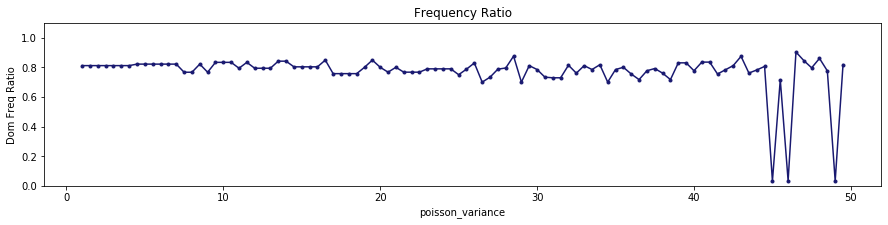

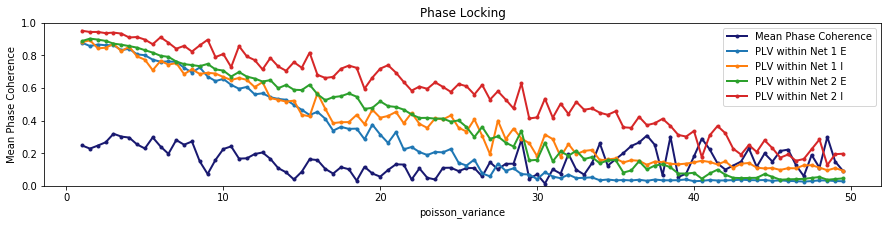

In [94]:
import pprint

plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None, vmax_phase=None)
pprint.pprint(ex.default_params)

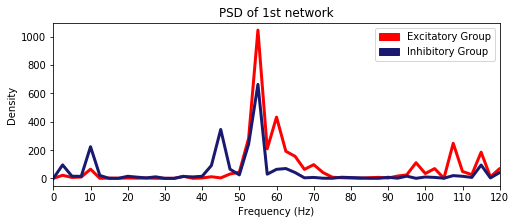

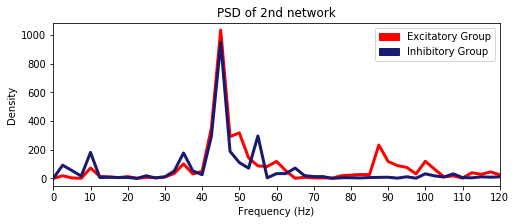

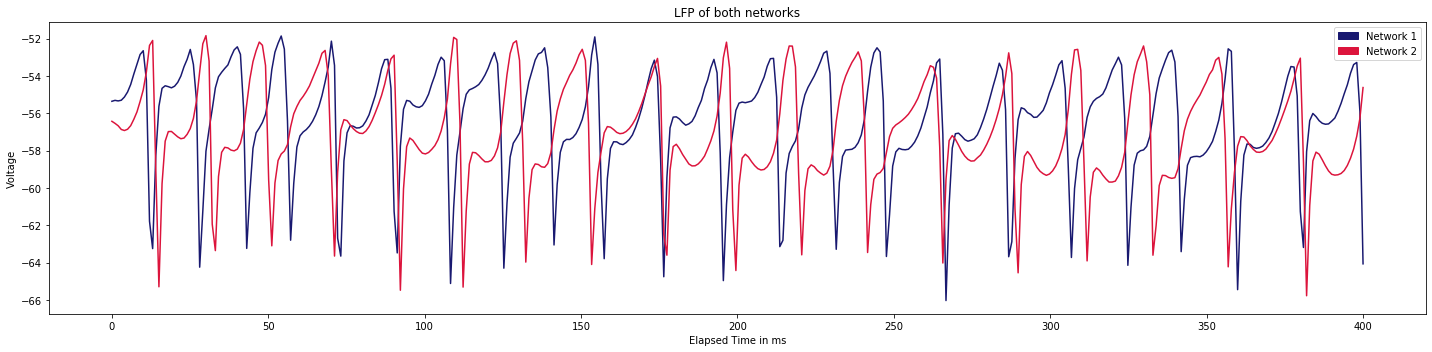

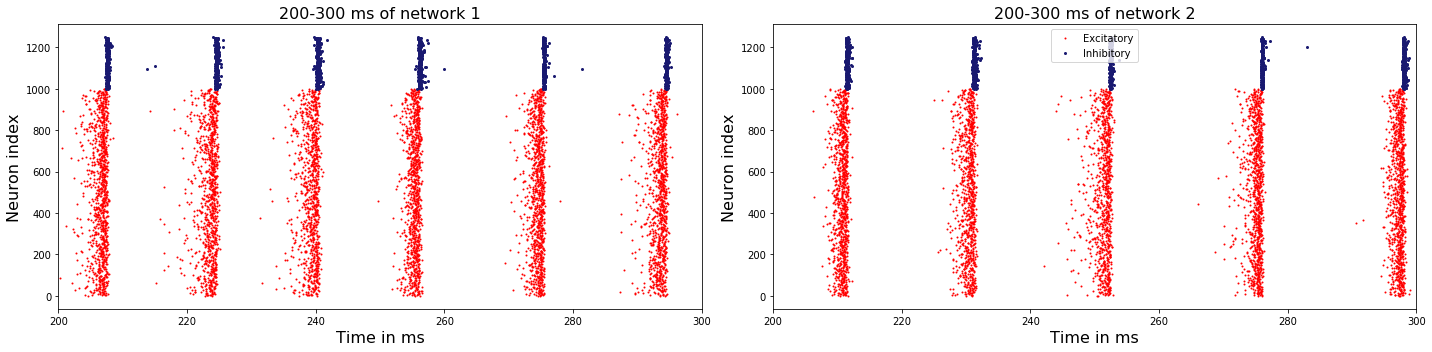

In [95]:
plots.plot_results(ex.get_run(5))

In [60]:
print(ex.params[5])
ex.default_params

{'poisson_variance': 3.5}


{'runtime': 500.0,
 'J_itoi': 6.0,
 'J_etoe': 0.1,
 'J_etoi': 0.3,
 'J_itoe': 6.0,
 'J_ppee': 1.3,
 'J_ppei': 1.3,
 'ou_enabled': [False, False],
 'poisson_enabled': [True, True],
 'poisson_variance': 3.5,
 'poisson_p': 0.7,
 'poisson_size': 800,
 'poisson_mean_input': 250,
 'N_pop': 2}

## Noise strength and ratio - Exploration

In [22]:
exp_params = {
  "poisson_variance": np.arange(1.0, 16.0, 1.0),
  "poisson_p": [0.6, 0.84],
}

ov_params = dict(params)
ov_params.update({
      "J_itoi": 3.0,
      "J_etoe": 0.6,
      "J_etoi": 3.2,
      "J_itoe": 7.0,
      "J_ppee": 0.6,
      "J_ppei": 0.6,
    
      "poisson_mean_input": 600,
})

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=ov_params,
    hdf_filename=constants.MODELS_PATH + "/2_nets_uncorr_synch_noise_strength_exploration.h5",
    exploration_name="run_9"
)

In [53]:
ex.run()

(pid=83718) Starting simulation at t=0. s for a duration of 0.4 s
(pid=83726) Initializing net ...
(pid=83726) Net 1 - poisson rate 40000.0 - single neuron 50.0
(pid=83726) Poisson strength: 0.015


2020-07-03 16:18:57,835	INFO resource_spec.py:212 -- Starting Ray with 10.84 GiB memory available for workers and up to 5.43 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-03 16:18:58,108	INFO services.py:1170 -- View the Ray dashboard at localhost:8265
  0%|          | 0/30 [00:00<?, ?it/s]

(pid=84066) Initializing net ...
(pid=84066) Net 1 - poisson rate 360000.0 - single neuron 450.0
(pid=84066) Poisson strength: 0.0016666666666666668
(pid=84061) Initializing net ...
(pid=84061) Net 1 - poisson rate 180000.0 - single neuron 225.0
(pid=84061) Poisson strength: 0.0033333333333333335
(pid=84065) Initializing net ...
(pid=84065) Net 1 - poisson rate 90000.0 - single neuron 112.5
(pid=84065) Poisson strength: 0.006666666666666667
(pid=84064) Initializing net ...
(pid=84064) Net 1 - poisson rate 360000.0 - single neuron 450.0
(pid=84064) Poisson strength: 0.0016666666666666668
(pid=84062) Initializing net ...
(pid=84062) Net 1 - poisson rate 120000.0 - single neuron 150.0
(pid=84062) Poisson strength: 0.005
(pid=84067) Initializing net ...
(pid=84067) Net 1 - poisson rate 120000.0 - single neuron 150.0
(pid=84067) Poisson strength: 0.005
(pid=84068) Initializing net ...
(pid=84068) Net 1 - poisson rate 72000.0 - single neuron 90.0
(pid=84068) Poisson strength: 0.0083333333333

  7%|▋         | 2/30 [00:44<14:24, 30.87s/it]

(pid=84069) Initializing net ...
(pid=84069) Net 1 - poisson rate 32727.272727272728 - single neuron 40.90909090909091
(pid=84069) Poisson strength: 0.018333333333333333
(pid=84064) Initializing net ...
(pid=84064) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=84064) Poisson strength: 0.02
(pid=84070) Initialization time: 1.8667850494384766s


 10%|█         | 3/30 [00:44<09:45, 21.67s/it]

(pid=84070) ==== Running Network ... ====


 13%|█▎        | 4/30 [00:44<06:35, 15.23s/it]

(pid=84063) Initialization time: 1.8627710342407227s
(pid=84069) Net 2 - rate for single neuron 34.36363636363636
(pid=84063) ==== Running Network ... ====
(pid=84064) Net 2 - rate for single neuron 22.5


 17%|█▋        | 5/30 [00:44<04:28, 10.72s/it]

(pid=84071) Initializing net ...
(pid=84071) Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
(pid=84071) Poisson strength: 0.021666666666666667
(pid=84068) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84071) Net 2 - rate for single neuron 20.769230769230766
(pid=84070) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84069) Initialization time: 1.9752540588378906s
(pid=84064) Initialization time: 1.9814980030059814s
(pid=84069) ==== Running Network ... ====
(pid=84064) ==== Running Network ... ====
(pid=84063) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84071) Initialization time: 2.0527029037475586s
(pid=84071) ==== Running Network ... ====


 20%|██        | 6/30 [00:47<03:21,  8.39s/it]

(pid=84069) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84064) Starting simulation at t=0. s for a duration of 0.4 s


 23%|██▎       | 7/30 [00:47<02:16,  5.94s/it]

(pid=84067) Initializing net ...
(pid=84067) Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
(pid=84067) Poisson strength: 0.021666666666666667


 33%|███▎      | 10/30 [00:48<00:43,  2.19s/it]

(pid=84067) Net 2 - rate for single neuron 29.076923076923073


 47%|████▋     | 14/30 [00:49<00:11,  1.41it/s]

(pid=84067) Initialization time: 2.1253790855407715s
(pid=84067) ==== Running Network ... ====
(pid=84088) Initializing net ...
(pid=84088) Net 1 - poisson rate 32727.272727272728 - single neuron 40.90909090909091
(pid=84088) Poisson strength: 0.018333333333333333
(pid=84088) Net 2 - rate for single neuron 24.545454545454543
(pid=84066) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84061) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84083) Initializing net ...
(pid=84083) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=84083) Poisson strength: 0.02
(pid=84068) 273.2 ms (68%) simulated in 10s, estimated 5s remaining.
(pid=84083) Net 2 - rate for single neuron 31.5
(pid=84072) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84088) Initialization time: 2.3983330726623535s
(pid=84088) ==== Running Network ... ====
(pid=84070) 271.85 ms (67%) simulated in 10s, estimated 5s remaining.
(pid=84063) 264.45 ms (66%) simulated in 10s, estimated 5s rema

 50%|█████     | 15/30 [01:14<02:01,  8.07s/it]

(pid=84068) Starting simulation at t=0. s for a duration of 0.4 s


 57%|█████▋    | 17/30 [01:15<00:55,  4.23s/it]

(pid=84067) 0.4 s (100%) simulated in 13s
(pid=84067) ==== Network Run Finished ====
(pid=84067) runtime: 25.7


 67%|██████▋   | 20/30 [01:16<00:15,  1.60s/it]

(pid=84088) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84070) 0.39265 s (98%) simulated in 10s, estimated < 1s remaining.
(pid=84070) 0.4 s (100%) simulated in 10s
(pid=84070) ==== Network Run Finished ====
(pid=84070) runtime: 11.7
(pid=84063) 0.4 s (100%) simulated in 9s
(pid=84063) ==== Network Run Finished ====
(pid=84063) runtime: 11.3
(pid=84069) 0.4 s (100%) simulated in 9s
(pid=84069) ==== Network Run Finished ====
(pid=84069) runtime: 10.6
(pid=84068) 0.4 s (100%) simulated in 8s
(pid=84068) ==== Network Run Finished ====
(pid=84068) runtime: 14.3
(pid=84083) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84088) 0.4 s (100%) simulated in 6s
(pid=84088) ==== Network Run Finished ====
(pid=84088) runtime: 31.6
(pid=84088) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


 73%|███████▎  | 22/30 [01:30<00:29,  3.64s/it]

(pid=84083) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=84083) 0.4 s (100%) simulated in 5s
(pid=84083) ==== Network Run Finished ====
(pid=84083) runtime: 32.9


100%|██████████| 30/30 [01:33<00:00,  3.10s/it]


In [54]:
ex.load_results(all=True)

100%|██████████| 30/30 [00:03<00:00,  9.45it/s]


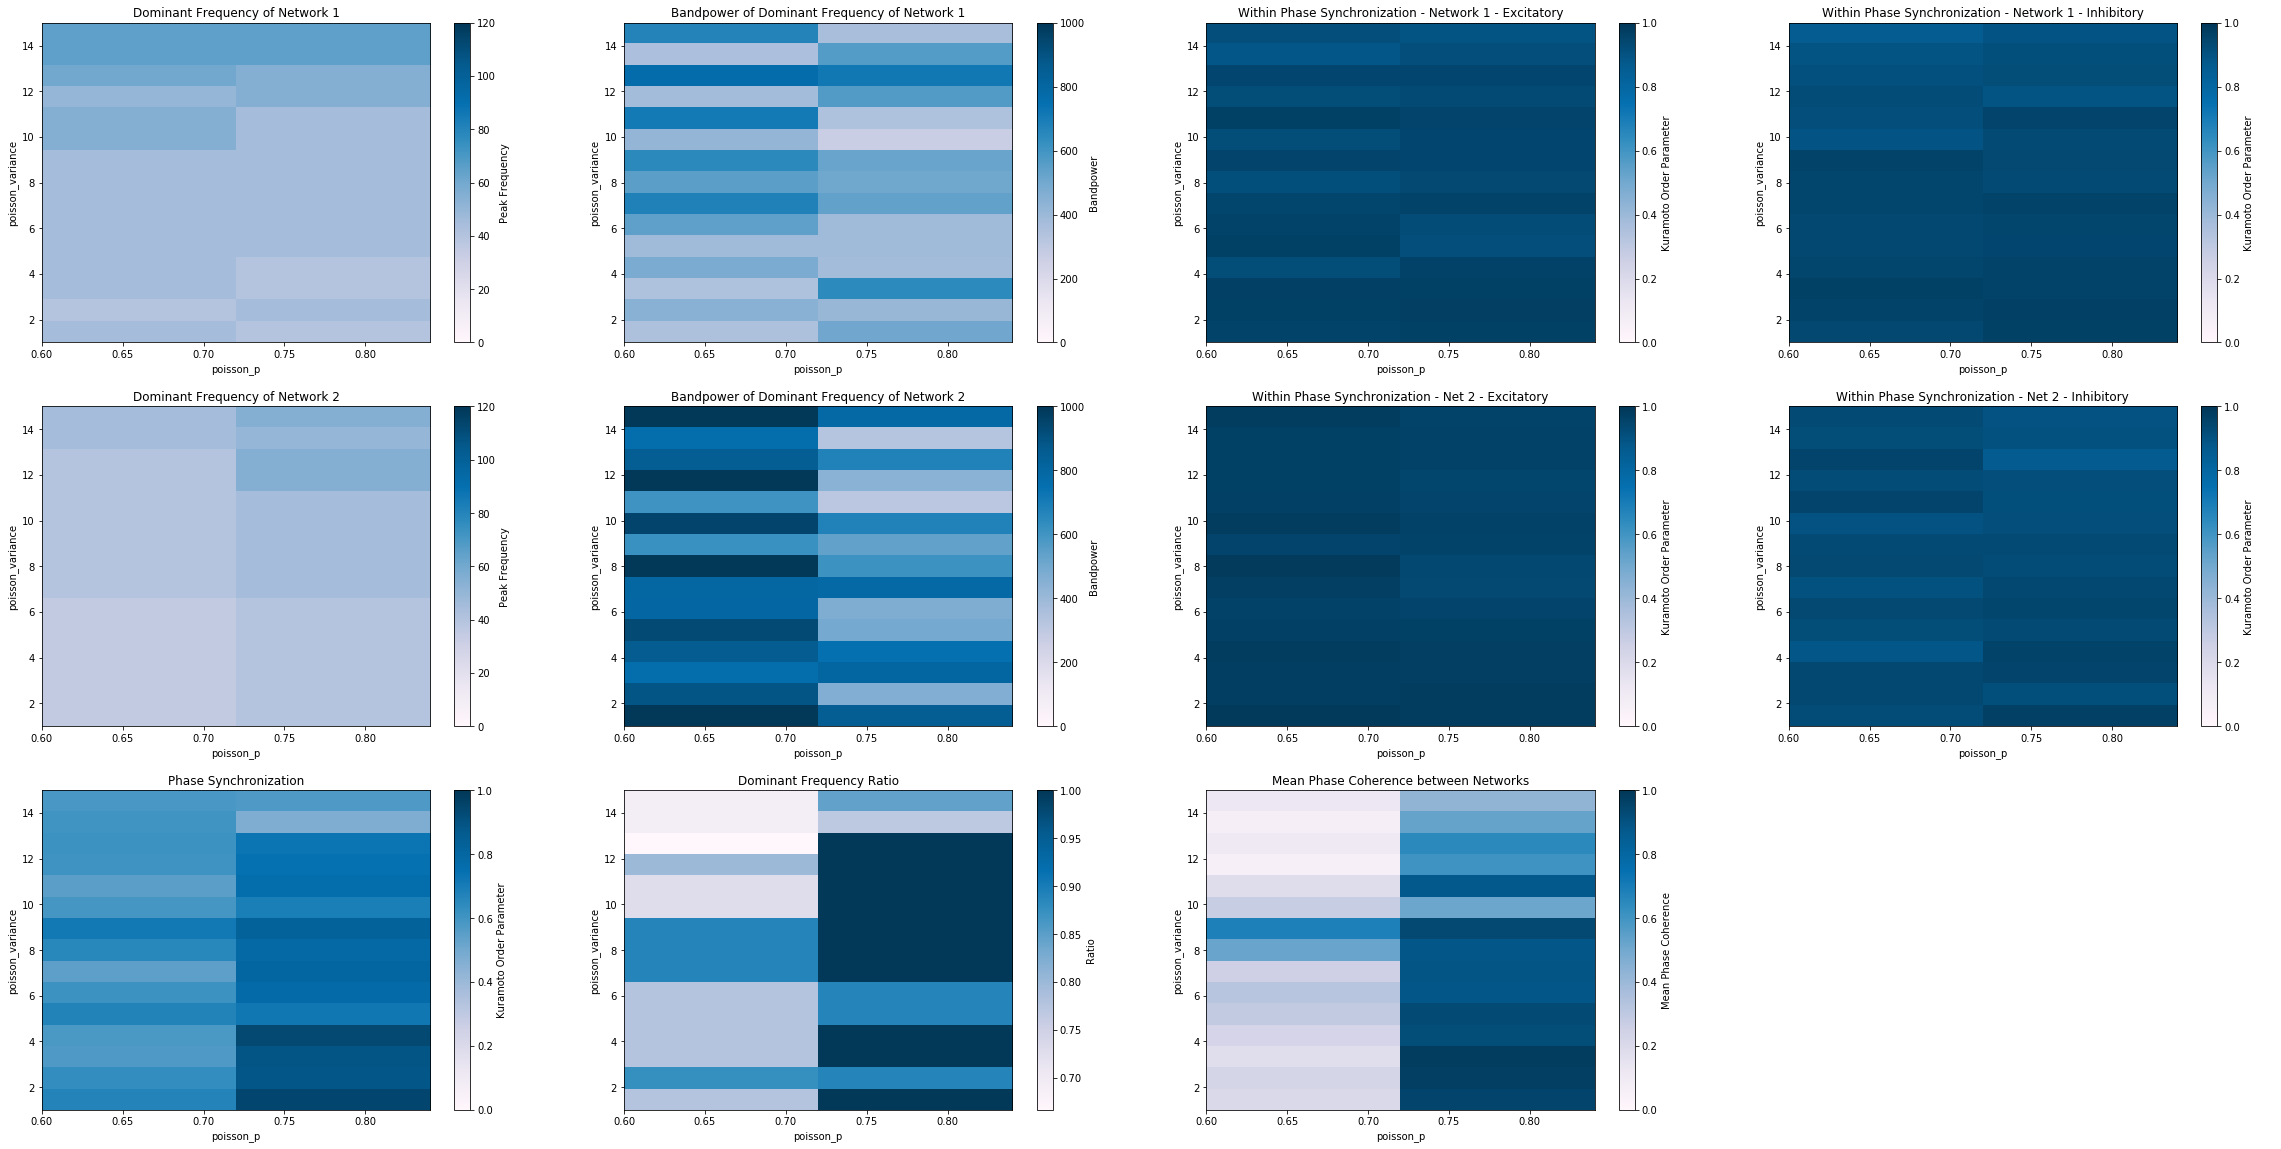

In [55]:
plots.plot_exploration(ex, vmin_ratio=None)